#**Análise de Vendedores**

###Carregando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

###Subindo planilhas

In [2]:
from google.colab import files
uploaded = files.upload()

Saving _ana.xlsx to _ana (5).xlsx
Saving _joao.xlsx to _joao (5).xlsx
Saving _jose.xlsx to _jose (5).xlsx


###Criando Dataframes das Planilhas

In [14]:
ana = pd.read_excel("_ana.xlsx",sheet_name="ana",skiprows=5,header=[0,1],nrows=23)
joao = pd.read_excel("_joao.xlsx",sheet_name="joao",skiprows=5,header=[0,1],nrows=23)
jose = pd.read_excel("_jose.xlsx",sheet_name="jose",skiprows=5,header=[0,1],nrows=23)

###Função Para Formatação dos Dataframes

In [15]:
def formatarDataframe(nome):
  nome.rename( columns={'Unnamed: 1_level_1':''}, inplace=True )
  nome.rename( columns={'Unnamed: 11_level_1':''}, inplace=True )
  nome.rename( columns={'Unnamed: 13_level_1':''}, inplace=True )
  nome.rename( columns={'Unnamed: 14_level_1':''}, inplace=True )
  nome.rename( columns={'Unnamed: 15_level_1':''}, inplace=True )

  nome.columns = nome.columns.map(' '.join)

  nome.dropna(how='all', axis=1, inplace=True)
  nome = nome.fillna('')

  nome['Venda Real'] = np.round(nome['Venda Real'],2)
  nome['Venda Projetada'] = np.round(nome['Venda Projetada'],2)
  nome['Venda Diferença'] = np.round(nome['Venda Diferença'],2)
  nome['Acumulado Real'] = np.round(nome['Acumulado Real'],2)
  nome['Acumulado Projetado'] = np.round(nome['Acumulado Projetado'],2)
  nome['Tendência '] = np.round(nome['Tendência '],2)

  nome.head()

  return nome

###Dataframe Formatado Ana

In [16]:
ana = formatarDataframe(ana)
ana.head()

,Data,Venda Real,Venda Projetada,Venda Diferença,Acumulado Real,Acumulado Projetado,Tendência,Clientes Abordados,Vendas Fechadas,Taxa de Conversão
0,2024-01-01,30,64.52,-34.52,30,64.52,30,1,2,2.000000
1,2024-01-02,20,64.52,-44.52,50,129.03,50,3,2,0.666667
2,2024-01-03,400,64.52,335.48,450,193.55,450,4,20,5.000000
3,2024-01-04,7,64.52,-57.52,457,258.06,457,5,3,0.600000
4,2024-01-05,80,64.52,15.48,537,322.58,537,6,3,0.500000


###Dataframe Formatado João

In [17]:
joao = formatarDataframe(joao)
joao.head()

,Data,Venda Real,Venda Projetada,Venda Diferença,Acumulado Real,Acumulado Projetado,Tendência,Clientes Abordados,Vendas Fechadas,Taxa de Conversão
0,2024-01-01,90.0,64.52,25.48,90.0,64.52,90.0,10,2,0.200000
1,2024-01-02,50.0,64.52,-14.52,140.0,129.03,140.0,3,2,0.666667
2,2024-01-03,120.0,64.52,55.48,260.0,193.55,260.0,20,20,1.000000
3,2024-01-04,90.0,64.52,25.48,350.0,258.06,350.0,5,3,0.600000
4,2024-01-05,50.0,64.52,-14.52,400.0,322.58,400.0,6,3,0.500000


###Dataframe Formatado José

In [18]:
jose = formatarDataframe(jose)
jose.head()

,Data,Venda Real,Venda Projetada,Venda Diferença,Acumulado Real,Acumulado Projetado,Tendência,Clientes Abordados,Vendas Fechadas,Taxa de Conversão
0,2024-01-01,80,64.52,15.48,80,64.52,80,20,2,0.100000
1,2024-01-02,40,64.52,-24.52,120,129.03,120,6,2,0.333333
2,2024-01-03,50,64.52,-14.52,170,193.55,170,7,20,2.857143
3,2024-01-04,60,64.52,-4.52,230,258.06,230,9,3,0.333333
4,2024-01-05,70,64.52,5.48,300,322.58,300,1,3,3.000000


## Comparação de Venda Real com Venda Projetada

<Axes: title={'center': 'José'}, xlabel='Data '>

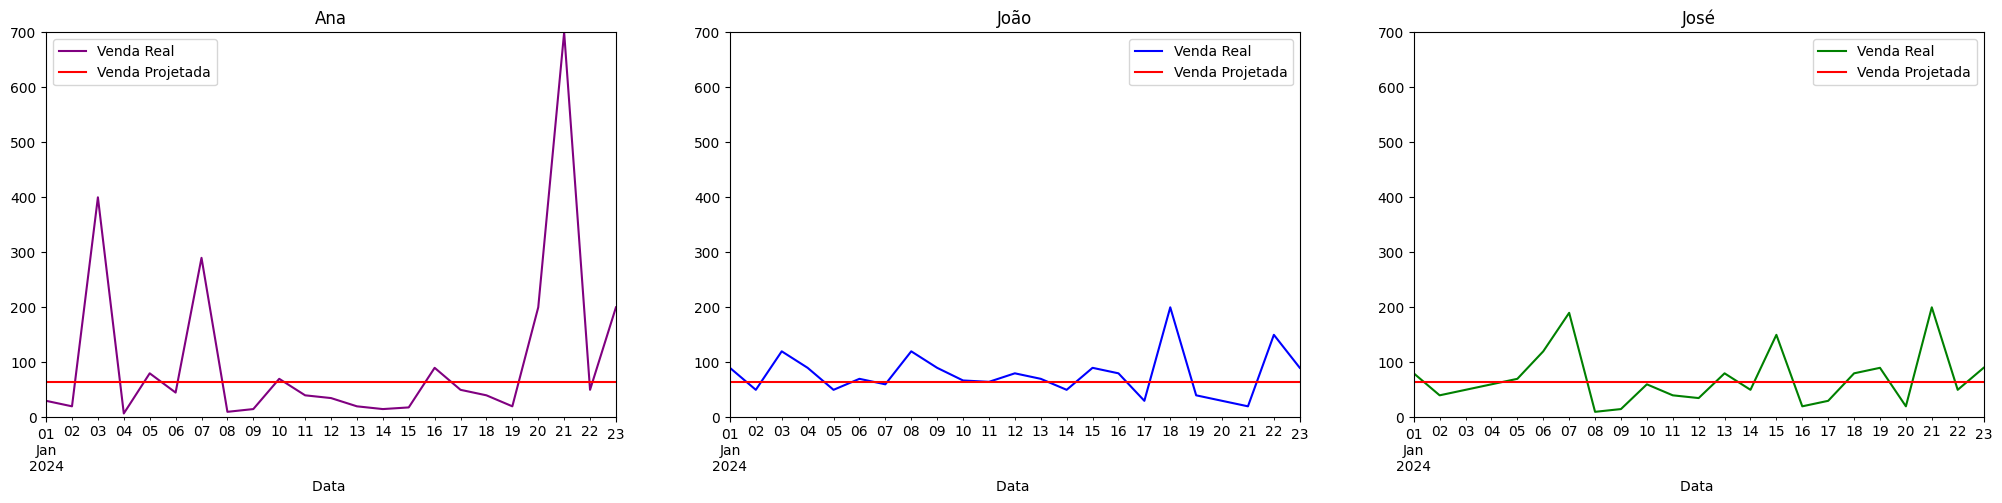

In [8]:
vendaAna = ana[['Data ','Venda Real','Venda Projetada']]
vendaJoao = joao[['Data ','Venda Real','Venda Projetada']]
vendaJose = jose[['Data ','Venda Real','Venda Projetada']]

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(25,5))

vendaAna.plot(title='Ana', x='Data ', ax=axes[0], ylim=(0,700),color=('purple','red'))
vendaJoao.plot(title='João', x='Data ', ax=axes[1], ylim=(0,700),color=('blue','red'))
vendaJose.plot(title='José', x='Data ', ax=axes[2], ylim=(0,700),color=('green','red'))

##Comparação de Venda Acumulada Real com Projetada

<Axes: title={'center': 'José'}, xlabel='Data '>

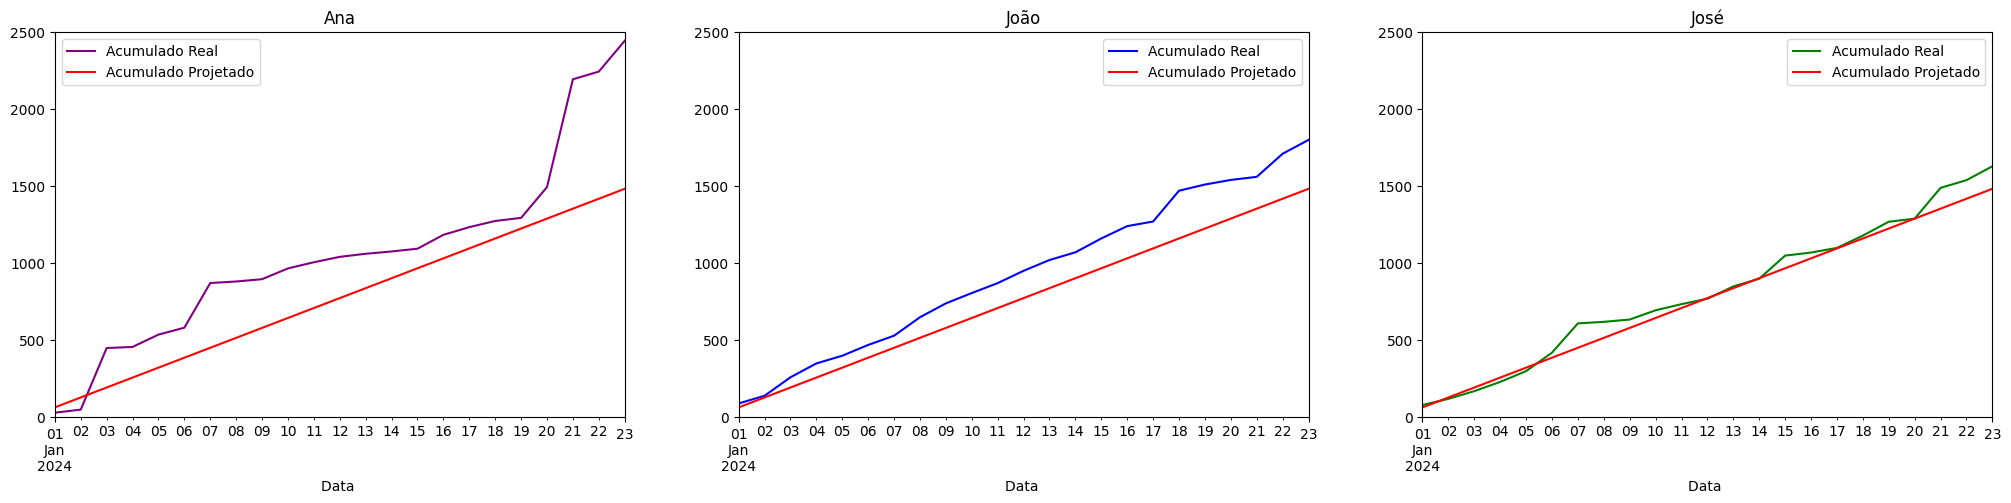

In [9]:
acumuladoAna = ana[['Data ','Acumulado Real','Acumulado Projetado']]
acumuladoJoao = joao[['Data ','Acumulado Real','Acumulado Projetado']]
acumuladoJose = jose[['Data ','Acumulado Real','Acumulado Projetado']]

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(25,5))

acumuladoAna.plot(title='Ana', x='Data ', ax=axes[0], ylim=(0,2500), color=('purple','red'))
acumuladoJoao.plot(title='João', x='Data ', ax=axes[1], ylim=(0,2500), color=('blue','red'))
acumuladoJose.plot(title='José', x='Data ', ax=axes[2], ylim=(0,2500), color=('green','red'))

##Comparação de Venda Real entre Vendedores

<Axes: title={'center': 'Comparação de Venda Real'}>

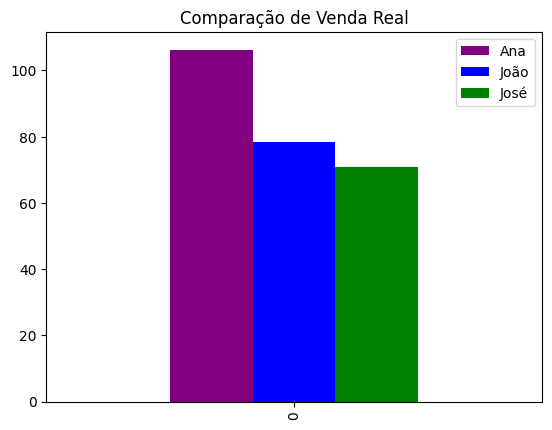

In [10]:
vendaMedia = pd.DataFrame(data={'Ana': [vendaAna['Venda Real'].mean()], 'João': [vendaJoao['Venda Real'].mean()], 'José': [vendaJose['Venda Real'].mean()]})

vendaMedia.plot(title='Comparação de Venda Real', kind='bar',color=('purple','blue','green'))


##Relação Entre Número de Clientes Abordados e Vendas Fechadas

<Axes: title={'center': 'Relação de Clientes Abordados e Vendas Fechadas'}, xlabel='Vendedores'>

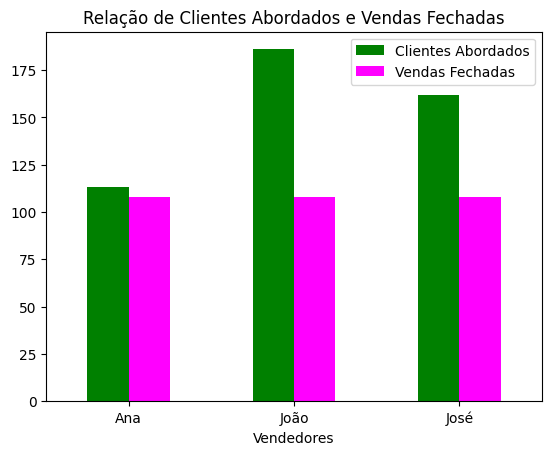

In [11]:
clientesAbordados = pd.DataFrame(data={'Vendedores':['Ana','João','José'],
                                       'Clientes Abordados': [ana['Clientes Abordados '].sum(),joao['Clientes Abordados '].sum(),jose['Clientes Abordados '].sum()],
                                       'Vendas Fechadas': [ana['Vendas Fechadas '].sum(),joao['Vendas Fechadas '].sum(),jose['Vendas Fechadas '].sum()]})

clientesAbordados.set_index('Vendedores',inplace=True)

clientesAbordados.plot(title='Relação de Clientes Abordados e Vendas Fechadas',kind='bar',color=('green','magenta'),rot=0)


##Conclusões



*   Todos os três vendedores alcançaram a meta esperada até o final do mês;
*   Ana apresentou melhor desempenho, tanto no valor das vendas fechadas como na taxa de conversão de número de clientes para vendas;
*   João apresentou o segundo melhor desempenho em valor das vendas fechadas, porém o terceiro na taxa de conversão de clientes. Recomendo orientá-lo a focar na qualidade dos atendimentos mais do que na quantidade;
*   José apresentou o terceiro melhor desempenho em valor das vendas fechadas, porém o segundo melhor na taxa de conversão de clientes. Oferecer um treinamento pode ser uma boa maneira melhorar a qualidade de seus atendimentos.

